# 利用框架中现有的 api 实现线性回归

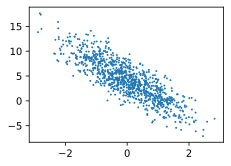

In [72]:
import numpy as np
import torch
from torch.utils import data
from d2l import torch as d2l

# 人工定义的权重 w 和偏置 b
true_w = torch.tensor([2, -3.4])
true_b = 4.2

# 人工生成数据集
featrues, labels = d2l.synthetic_data(true_w, true_b, 1000)

d2l.set_figsize()
d2l.plt.scatter(featrues[:,(1)].detach().numpy(),
                labels.detach().numpy(), 1)

读取数据

In [73]:
def load_array(data_arrays, batch_size, is_train=True):
    '''构造一个 PyTorch 数据迭代器'''
    # 这里 * 的作用是将调用时提供的所有值放在一个元组
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

batch_size = 10
data_iter = load_array((featrues, labels), batch_size)

next(iter(data_iter))

[tensor([[ 1.4603,  1.8075],
         [ 0.3397, -0.2514],
         [ 0.2273, -0.8782],
         [-0.6704,  1.0899],
         [ 0.2964,  0.0911],
         [-0.8168,  2.4663],
         [-2.4202,  0.6528],
         [-0.5530,  0.8863],
         [ 0.6057,  1.3642],
         [ 0.2015, -0.6927]]),
 tensor([[ 0.9773],
         [ 5.7401],
         [ 7.6388],
         [-0.8406],
         [ 4.4854],
         [-5.8199],
         [-2.8509],
         [ 0.0979],
         [ 0.7800],
         [ 6.9513]])]

使用框架里预定义好的层

In [74]:
from torch import nn

# 输入为长度为 2 的向量，输出为一个标量，使用神经网络线性层
net = nn.Sequential(nn.Linear(2, 1))

初始化模型参数

In [75]:
# 权重初始化为均匀分布
net[0].weight.data.normal_(0, 0.01)

# 偏置初始化为全 0
net[0].bias.data.fill_(0)

tensor([0.])

定义损失函数

In [76]:
loss = nn.MSELoss()

实例化 SDG 实例（优化器）

In [77]:
trainer = torch.optim.SGD(net.parameters(), lr=0.03)

训练过程

In [78]:
num_epochs = 3  # 迭代周期为 3 次

for eqoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X), y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(net(featrues), labels)
    print(f'eqoch {eqoch + 1}, loss {l:f}')

eqoch 1, loss 0.000229
eqoch 2, loss 0.000106
eqoch 3, loss 0.000106
